In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
path = "../2 - Arquivo Tratado/2022_forbes_billionaires.csv"
data_bill = pd.read_csv(path, sep=',', index_col='rank')

data_bill.drop('Unnamed: 0', axis=1, inplace=True)

#data_bill = data_bill.set_index('rank')

data_bill['networth']=data_bill['networth'].str.replace('$','')
data_bill['networth']=data_bill['networth'].str.replace(' B','')
data_bill['networth']=data_bill['networth'].apply(pd.to_numeric)

data_bill.head(10)

C:\Users\DellWyse\AppData\Local\Temp\ipykernel_17064\885507208.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_bill['networth']=data_bill['networth'].str.replace('$','')


,name,networth,age,country,source,industry
rank,,,,,,
1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
2,Jeff Bezos,171.0,58,United States,Amazon,Technology
3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
4,Bill Gates,129.0,66,United States,Microsoft,Technology
5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
6,Larry Page,111.0,49,United States,Google,Technology
7,Sergey Brin,107.0,48,United States,Google,Technology
8,Larry Ellison,106.0,77,United States,software,Technology
9,Steve Ballmer,91.4,66,United States,Microsoft,Technology


In [3]:
data_bill.industry.unique()

array(['Automotive ', 'Technology ', 'Fashion & Retail ',
       'Finance & Investments ', 'Diversified ', 'Media & Entertainment ',
       'Telecom ', 'Food & Beverage ', 'Logistics ', 'Real Estate ',
       'Metals & Mining ', 'Manufacturing ', 'Gambling & Casinos ',
       'Healthcare ', 'Service ', 'Energy ',
       'Construction & Engineering ', 'Sports '], dtype=object)

In [4]:
data_bill.country.unique()

array(['United States', 'France', 'India', 'Mexico', 'China', 'Canada',
       'Spain', 'Germany', 'Hong Kong', 'Italy', 'Australia', 'Austria',
       'Japan', 'Indonesia', 'Switzerland', 'Chile', 'Russia',
       'Singapore', 'Sweden', 'Czechia', 'United Kingdom', 'Brazil',
       'Israel', 'Netherlands', 'Ireland', 'Nigeria', 'Denmark',
       'Thailand', 'Cyprus', 'Malaysia', 'Taiwan', 'Monaco', 'Colombia',
       'New Zealand', 'South Korea', 'Belgium', 'South Africa',
       'Philippines', 'Egypt', 'Greece', 'Norway', 'Vietnam', 'Poland',
       'Eswatini (Swaziland)', 'Peru', 'Algeria', 'Kazakhstan', 'Georgia',
       'Portugal', 'Turkey', 'Finland', 'Ukraine', 'Argentina', 'Belize',
       'Venezuela', 'Lebanon', 'Zimbabwe', 'Romania',
       'United Arab Emirates', 'Oman', 'Iceland', 'Guernsey',
       'Liechtenstein', 'Qatar', 'Morocco', 'Bulgaria', 'Macau',
       'Slovakia', 'Barbados', 'Uruguay', 'Nepal', 'Tanzania',
       'St. Kitts and Nevis', 'Hungary', 'Estonia'], dty

In [36]:
country_count = pd.DataFrame(data_bill.groupby(['country']).name.count())
country_count = country_count.sort_values(by='name').reset_index()
country_count.columns = ['Country', 'No_Billionaries']
country_count

,Country,No_Billionaries
0,Algeria,1
1,Venezuela,1
2,Tanzania,1
3,St. Kitts and Nevis,1
4,Portugal,1
...,...,...
70,Russia,81
71,Germany,130
72,India,161
73,China,515


<AxesSubplot:title={'center':'TOP-20 Countryes x Billionaries'}, xlabel='Country', ylabel='Number of Billionaries'>

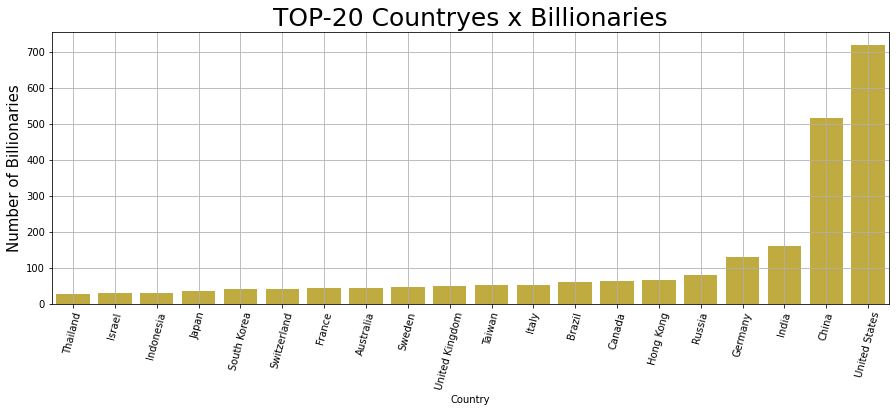

In [63]:
ax = sns.barplot(data=country_count[-20:], x='Country', y='No_Billionaries', color="gold", saturation=0.5)

ax.figure.set_size_inches(15, 5)

plt.title("TOP-20 Countryes x Billionaries", fontsize=25)
plt.ylabel("Number of Billionaries", fontsize=15)

plt.grid(True)

plt.xticks(rotation=75)
ax

In [55]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

industry_count = pd.DataFrame(data_bill.groupby(['industry']).name.count())
industry_count = industry_count.sort_values(by='name').reset_index()
industry_count.columns = ['Industry', 'No_Billionaries_Industries']
industry_count

,Industry,No_Billionaries_Industries
0,Gambling & Casinos,23
1,Sports,26
2,Telecom,35
3,Logistics,35
4,Construction & Engineering,43
5,Service,51
6,Metals & Mining,67
7,Automotive,69
8,Energy,93
9,Media & Entertainment,95


<AxesSubplot:title={'center':'Industry x Billionaries'}, xlabel='Industry', ylabel='Nº of Industries With Billionaries'>

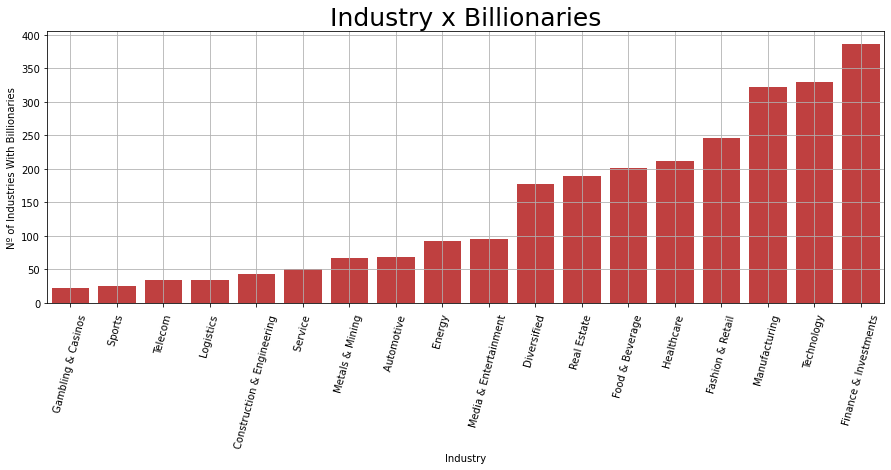

In [61]:
ax = sns.barplot(data=industry_count, x='Industry', y='No_Billionaries_Industries', color="red", saturation=0.5)

ax.figure.set_size_inches(15, 5)

plt.title("Industry x Billionaries", fontsize=25)
plt.ylabel("Nº of Industries With Billionaries", fontsize=10)

plt.grid(True)

plt.xticks(rotation=75)
ax

This barplot shows the top 15 richest people in the world



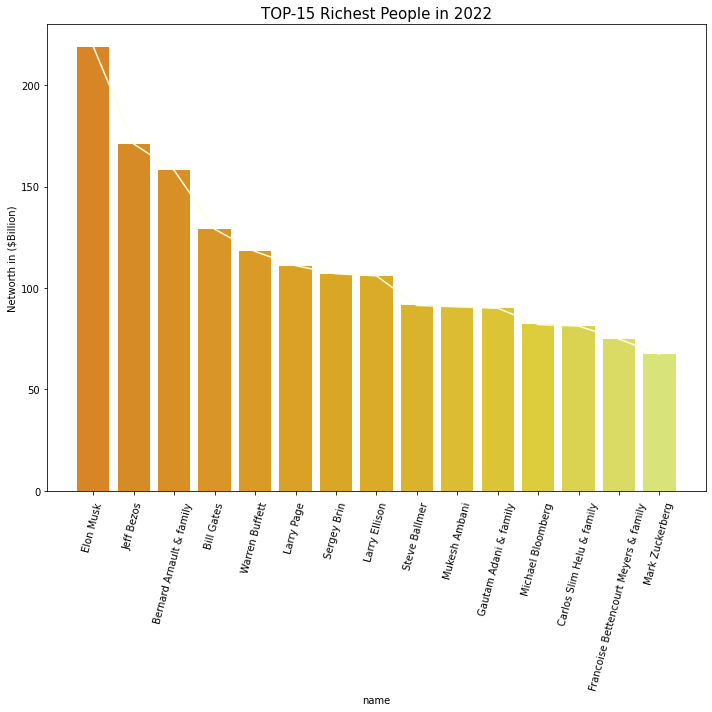

In [94]:
print("This barplot shows the top 15 richest people in the world\n")

X=data_bill["networth"].head(15)
Y=data_bill["name"].head(15)
Z=data_bill["country"].head(15)
plt.figure(figsize=(10,10))

A=sns.barplot(data=data_bill,x=Y,y=X,color="red",palette="Wistia_r",saturation=0.7)

plt.plot(Y,X,color="lightyellow")
plt.ylabel("Networth in ($Billion)", fontsize=10)
plt.xticks(rotation=75, size=10)
plt.title("TOP-15 Richest People in 2022", fontsize=15)
plt.tight_layout()
plt.show()



Classifying billionaires on the basis of the Industry they work in: 




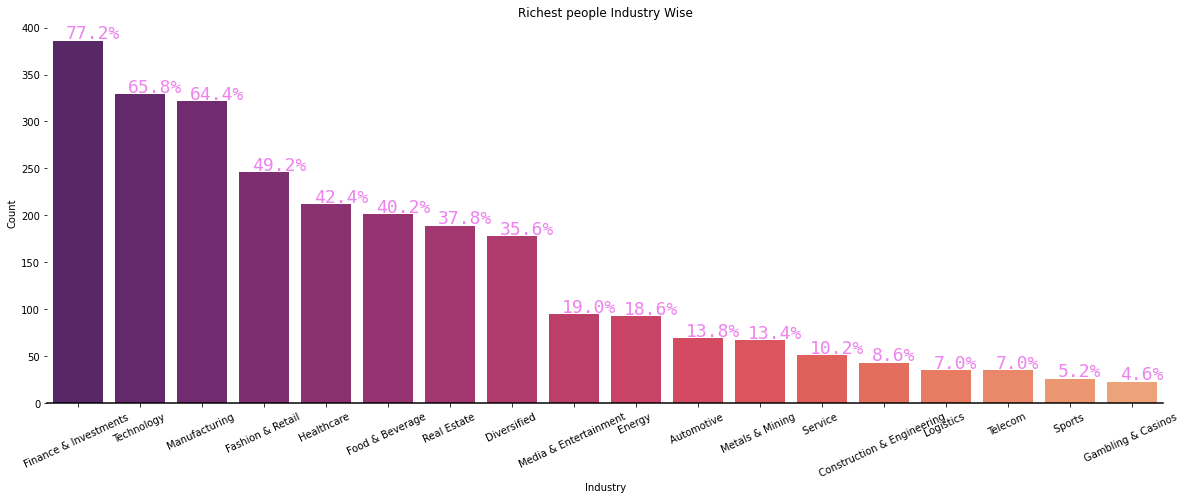

In [100]:
#Industry Wise
#display(data_bill["industry"].value_counts())
print("\n\nClassifying billionaires on the basis of the Industry they work in: \n\n")
Ind=data_bill["industry"].value_counts()
plt.figure(figsize=(20,7))
B=sns.barplot(data=data_bill,x=Ind.index,y=Ind,palette="flare_r",saturation=1)
B.spines['bottom'].set_linewidth(1.5)
for w in ['right', 'top', 'left']:
    B.spines[w].set_visible(False)
plt.xlabel("Industry")
plt.xticks(rotation=25)
plt.ylabel("Count")
plt.title("Richest people Industry Wise")

k=0
for p in B.patches:
    height = p.get_height()
    plt.text((p.get_x() + (p.get_width()/2-0.2)),height+2, "{}%".format(round((Ind[k]/5),2)),
             fontname = 'monospace', fontsize = 18, color = 'violet') 
    k+=1
plt.show()

In [108]:
joint_bill = data_bill.reset_index()

                                        Joint Plot: 



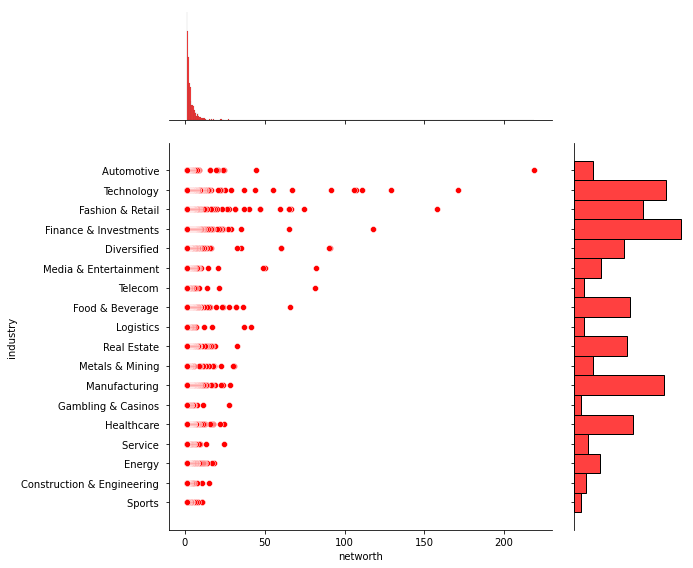

In [110]:
#Joint Plot
print("                                        Joint Plot: \n")

sns.jointplot(data=joint_bill, y="industry", x="networth",color="red",height=8,ratio=3)

plt.xlabel("Networth")
plt.ylabel("Industry")
#plt.title("Richest people Industry Wise")


plt.show()